Obiettivo:
Addestrare un classificatore supervisionato **RandomForest** multi-classe (0 = non consigliato, 1 = consigliato, 2 = sorpresa) sulle giornate passate G4–G38, e prevedere le etichette per G39.

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# STEP 1: Carica il dataset
df = pd.read_csv("Dataset_Per_Classificazione.csv")

# STEP 2: Preprocessing
df['Giornata_Num'] = df['Giornata'].str.extract('G(\d+)').astype(int)

# Train = giornate G4–G38 con etichetta nota
df_train = df[(df['Giornata_Num'] < 39) & (df['Etichetta'].notnull())].copy()
# Test = giornata G39, senza etichetta
df_test = df[df['Giornata_Num'] == 39].copy()

# STEP 3: Seleziona feature e target
features = ['Score_norm', 'Prob_Gol', 'Pred_Gol_Pesata', 'GolUlt3']
X_train = df_train[features]
y_train = df_train['Etichetta']
X_test = df_test[features]

# Validazione
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# STEP 4: Addestramento modello
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_tr, y_tr)

# Valutazione su validation set
y_val_pred = model.predict(X_val)
print("RandomForest - Classification Report:")
print(classification_report(y_val, y_val_pred))

# STEP 5: Predizione su G39
y_pred_g39 = model.predict(X_test)
df_test['Etichetta_Predetta'] = y_pred_g39.astype(int)

# Converti le etichette numeriche in testo
df_test['Etichetta_Predetta'] = df_test['Etichetta_Predetta'].replace({
    0: 'non consigliato',
    1: 'consigliato',
    2: 'sorpresa'
})

# STEP 6: Salva il risultato (senza la colonna GolUlt3)
df_test[['Giocatore', 'Team', 'Role', 'Score_norm', 'Prob_Gol', 'Pred_Gol_Pesata', 'Etichetta_Predetta']]\
    .to_csv("Etichette_Predette_G39_RandomForest.csv", index=False)
print(" File salvato: Etichette_Predette_G39_RandomForest.csv")

# Salva predizioni su validation set (valori numerici)
df_val_rf = pd.DataFrame({'RF_Pred': y_val_pred})
df_val_rf.to_csv("Val_RF.csv", index=False)

from google.colab import files
files.download("Etichette_Predette_G39_RandomForest.csv")


RandomForest - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4057
         1.0       1.00      0.99      0.99       605
         2.0       0.98      0.97      0.97       161

    accuracy                           1.00      4823
   macro avg       0.99      0.99      0.99      4823
weighted avg       1.00      1.00      1.00      4823

 File salvato: Etichette_Predette_G39_RandomForest.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

OBIETTIVO
Addestrare un classificatore supervisionato **DecisionTree** multi-classe (0 = non consigliato, 1 = consigliato, 2 = sorpresa) sulle giornate passate G4–G38, e prevedere le etichette per G39.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# STEP 1: Carica il dataset
df = pd.read_csv("Dataset_Per_Classificazione.csv")

# STEP 2: Preprocessing
df['Giornata_Num'] = df['Giornata'].str.extract('G(\d+)').astype(int)
df_train = df[(df['Giornata_Num'] < 39) & (df['Etichetta'].notnull())].copy()
df_test = df[df['Giornata_Num'] == 39].copy()

# STEP 3: Seleziona feature e target
features = ['Score_norm', 'Prob_Gol', 'Pred_Gol_Pesata', 'GolUlt3']
X_train = df_train[features]
y_train = df_train['Etichetta']
X_test = df_test[features]

# Split interno per valutazione
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# STEP 4: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=6)
dt_model.fit(X_tr, y_tr)
dt_val_pred = dt_model.predict(X_val)

print("Decision Tree - Classification Report:")
print(classification_report(y_val, dt_val_pred))


# STEP 5: Predizione finale su G39
y_pred_g39 = dt_model.predict(X_test)
df_test['Etichetta_Predetta'] = y_pred_g39.astype(int)

# Converti le etichette numeriche in testo
df_test['Etichetta_Predetta'] = df_test['Etichetta_Predetta'].replace({
    0: 'non consigliato',
    1: 'consigliato',
    2: 'sorpresa'
})

# STEP 6: Salva output (senza GolUlt3)
df_test[['Giocatore', 'Team', 'Role', 'Score_norm', 'Prob_Gol', 'Pred_Gol_Pesata', 'Etichetta_Predetta']]\
    .to_csv("Etichette_Predette_G39_DecisionTree.csv", index=False)
print(" File finale salvato come Etichette_Predette_G39_DecisionTree.csv")

# Salva predizioni su validation set (valori numerici)
df_val_dt = pd.DataFrame({'DT_Pred': dt_val_pred})
df_val_dt.to_csv("Val_DT.csv", index=False)

from google.colab import files
files.download("Etichette_Predette_G39_DecisionTree.csv")


Decision Tree - Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4057
         1.0       0.98      0.98      0.98       605
         2.0       0.99      0.72      0.83       161

    accuracy                           0.99      4823
   macro avg       0.99      0.90      0.94      4823
weighted avg       0.99      0.99      0.99      4823

 File finale salvato come Etichette_Predette_G39_DecisionTree.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Matrice di confusione incrociata tra modelli utilizzata per vedere come differiscono.
Se la matrice è perfettamente diagonale, allora i modelli fanno sempre la stessa predizione. Più è "dispersa", più divergono.

Confusione incrociata RF vs DT:
[[4057    5    0]
 [   9  590    3]
 [  36    9  114]]


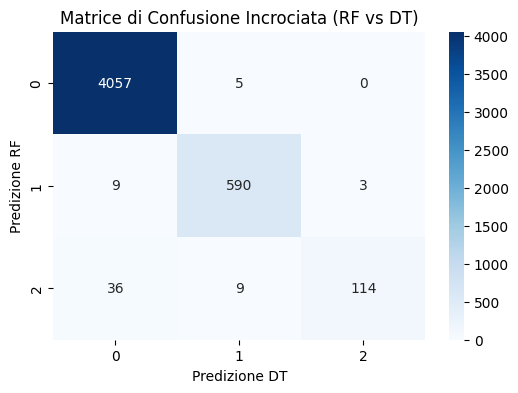

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Carica le predizioni dei due modelli
rf = pd.read_csv("Val_RF.csv")['RF_Pred']
dt = pd.read_csv("Val_DT.csv")['DT_Pred']

# Matrice di confusione incrociata (righe = RF, colonne = DT)
mat_incrociata = confusion_matrix(rf, dt, labels=[0, 1, 2])
print("Confusione incrociata RF vs DT:")
print(mat_incrociata)

# Visualizza heatmap
plt.figure(figsize=(6,4))
sns.heatmap(mat_incrociata, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title("Matrice di Confusione Incrociata (RF vs DT)")
plt.xlabel("Predizione DT")
plt.ylabel("Predizione RF")
plt.show()


Confronto righe per righe

In [14]:
import numpy as np

# Carica le predizioni precedentemente salvate
rf_val_pred = pd.read_csv("Val_RF.csv")['RF_Pred'].values
dt_val_pred = pd.read_csv("Val_DT.csv")['DT_Pred'].values

# Confronta predizioni riga per riga
comparison = rf_val_pred == dt_val_pred
n_equal = np.sum(comparison)
n_total = len(comparison)

print(f"Predizioni identiche: {n_equal} su {n_total} ({(n_equal/n_total)*100:.2f}%)")


Predizioni identiche: 4761 su 4823 (98.71%)


Ora andiamo a confrontare i due modelli di classificazione supervisionata, Random Forest e Decision Tree, sulla base di un dataset contenente le prestazioni dei giocatori da G4 A G38.

Dopo aver caricato e preprocessato i dati, si esegue una suddivisione in training e validation set, si addestrano entrambi i modelli e se ne valuta le loro prestazioni secondo diverse metriche quantitative (accuracy, precision, recall, F1-score, Cohen’s Kappa, log loss, tempo di predizione).

Il risultato finale è una tabella comparativa che consente di determinare quale dei due modelli è più adatto al compito di classificazione nel contesto del progetto.

In [15]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    cohen_kappa_score, log_loss, classification_report
)

# 1. Carica il dataset
df = pd.read_csv("Dataset_Per_Classificazione.csv")

# 2. Preprocessing
df['Giornata_Num'] = df['Giornata'].str.extract('G(\d+)').astype(int)
df_train = df[(df['Giornata_Num'] < 39) & (df['Etichetta'].notnull())].copy()

# 3. Definisci feature e target
features = ['Score_norm', 'Prob_Gol', 'Pred_Gol_Pesata', 'GolUlt3']
X = df_train[features]
y = df_train['Etichetta']

# 4. Train-test split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Inizializza i modelli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)

# 6. Funzione per valutare i modelli
def evaluate_model(name, model, X_tr, y_tr, X_val, y_val, results_dict):
    model.fit(X_tr, y_tr)

    start = time.time()
    y_pred = model.predict(X_val)
    pred_time = time.time() - start

    y_proba = model.predict_proba(X_val)

    results_dict[name] = {
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision (macro)': precision_score(y_val, y_pred, average='macro'),
        'Recall (macro)': recall_score(y_val, y_pred, average='macro'),
        'F1-score (macro)': f1_score(y_val, y_pred, average='macro'),
        'Cohen Kappa': cohen_kappa_score(y_val, y_pred),
        'Log Loss': log_loss(y_val, y_proba),
        'Prediction Time (s)': pred_time
    }

# 7. Esegui valutazione
results = {}
evaluate_model("Random Forest", rf_model, X_tr, y_tr, X_val, y_val, results)
evaluate_model("Decision Tree", dt_model, X_tr, y_tr, X_val, y_val, results)

# 8. Mostra i risultati
results_df = pd.DataFrame(results).T
print("Confronto tra modelli:\n")
print(results_df)


Confronto tra modelli:

               Accuracy  Precision (macro)  Recall (macro)  F1-score (macro)  \
Random Forest  0.997719           0.992111        0.986811          0.989446   
Decision Tree  0.987145           0.986547        0.899341          0.935786   

               Cohen Kappa  Log Loss  Prediction Time (s)  
Random Forest     0.991700  0.043299             0.053134  
Decision Tree     0.952043  0.069273             0.002955  


La Fase 3.1 ha permesso di sviluppare un classificatore supervisionato in grado di etichettare i giocatori come consigliati, non consigliati o sorprese in vista delle giornate successive.

Dopo un confronto strutturato tra Decision Tree e Random Forest, basato su metriche quantitative (accuracy, recall, F1-score, Cohen's Kappa, log-loss), è stato selezionato il modello Random Forest per la sua superiorità predittiva e robustezza generale.

Il modello è stato quindi utilizzato per predire le etichette della giornata G39.